# Analysis of the new datasets

In [1]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib import colors

from definitions import *  # imports all functions from definitions.py
from bootstrap_sampling import *

xr.set_options(
    keep_attrs=True, display_style="html"
)  # Attributes of DataArrays will be kept through operations.
plt.rcParams["font.size"] = "22"


alt = [
    70,
    72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    110,
    112,
    114,
    116,
    118,
    120,
]
root_path = "/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/"
dir_path = "/home/hochatmstud/bene/"

In [2]:
station = "Leipzig"

## Wind measurements

In [3]:
ds_wind = read_group("wind", station)

u = read_var(ds_wind, "u0")
v = read_var(ds_wind, "v0")

u_anomalie = anomalie("dayofyear", u)

v_anomalie = anomalie("dayofyear", v)

sea_u = sea(40, station, u)
sea_u_anomalie = sea(40, station, u_anomalie)

sea_v = sea(40, station, v)
sea_v_anomalie = sea(40, station, v_anomalie)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Zonal wind component

#### Climatology

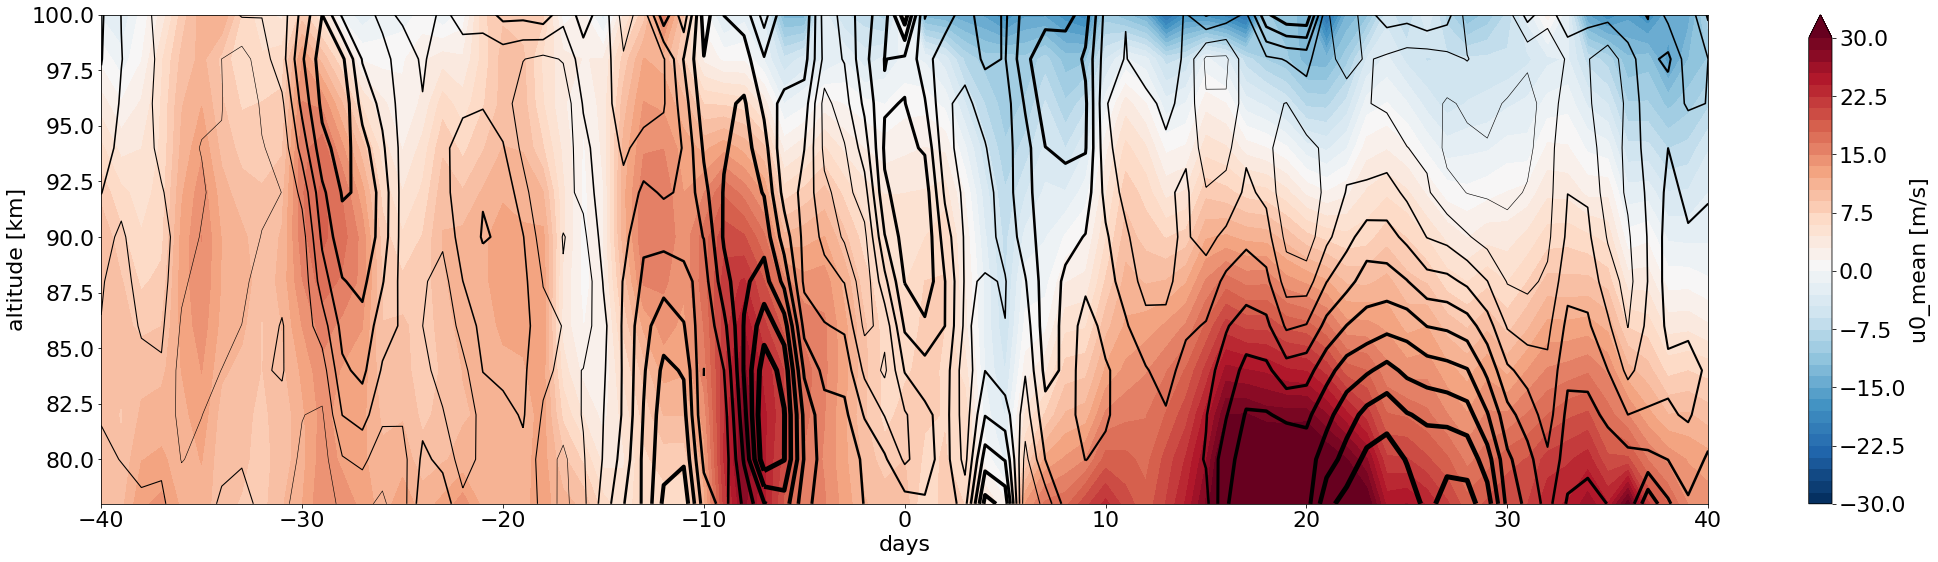

In [4]:
plotting_routine(sea_u, "u0")

#### Anomalies

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


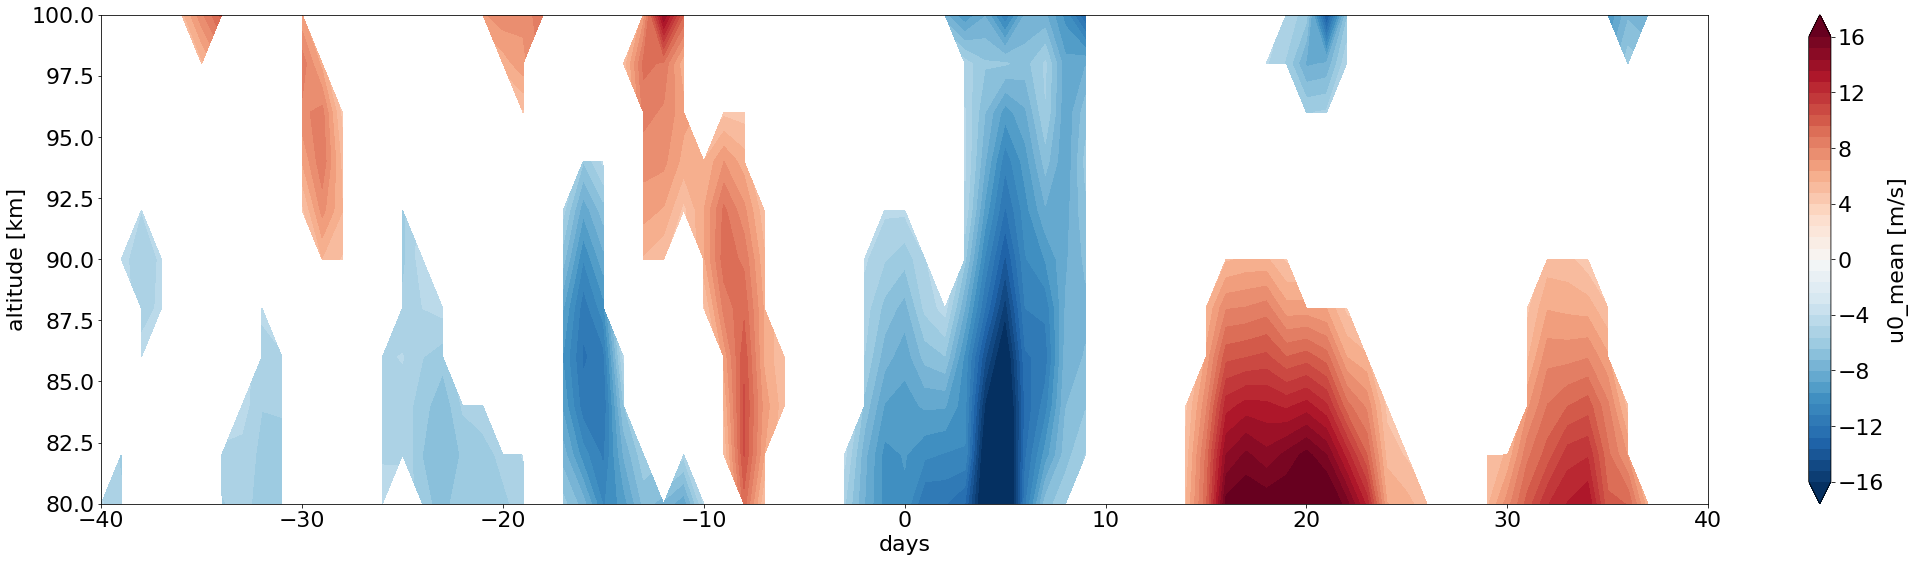

In [5]:
# plotting_routine(sea_u_anomalie,'u0')
stat_signific(station, sea_u_anomalie, u_anomalie, "u0")

### Meridional wind component

#### Climatology

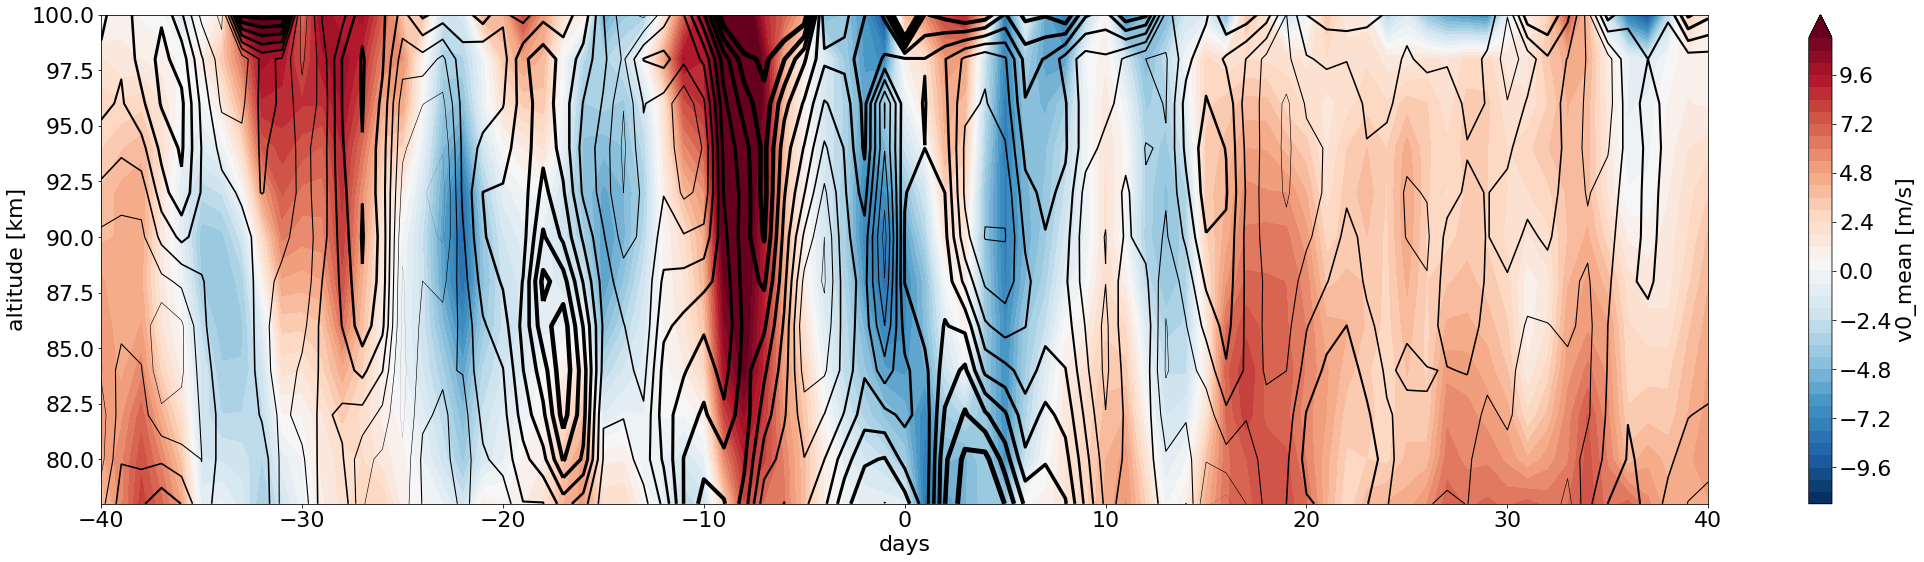

In [6]:
plotting_routine(sea_v, "v0")

#### Anomalies

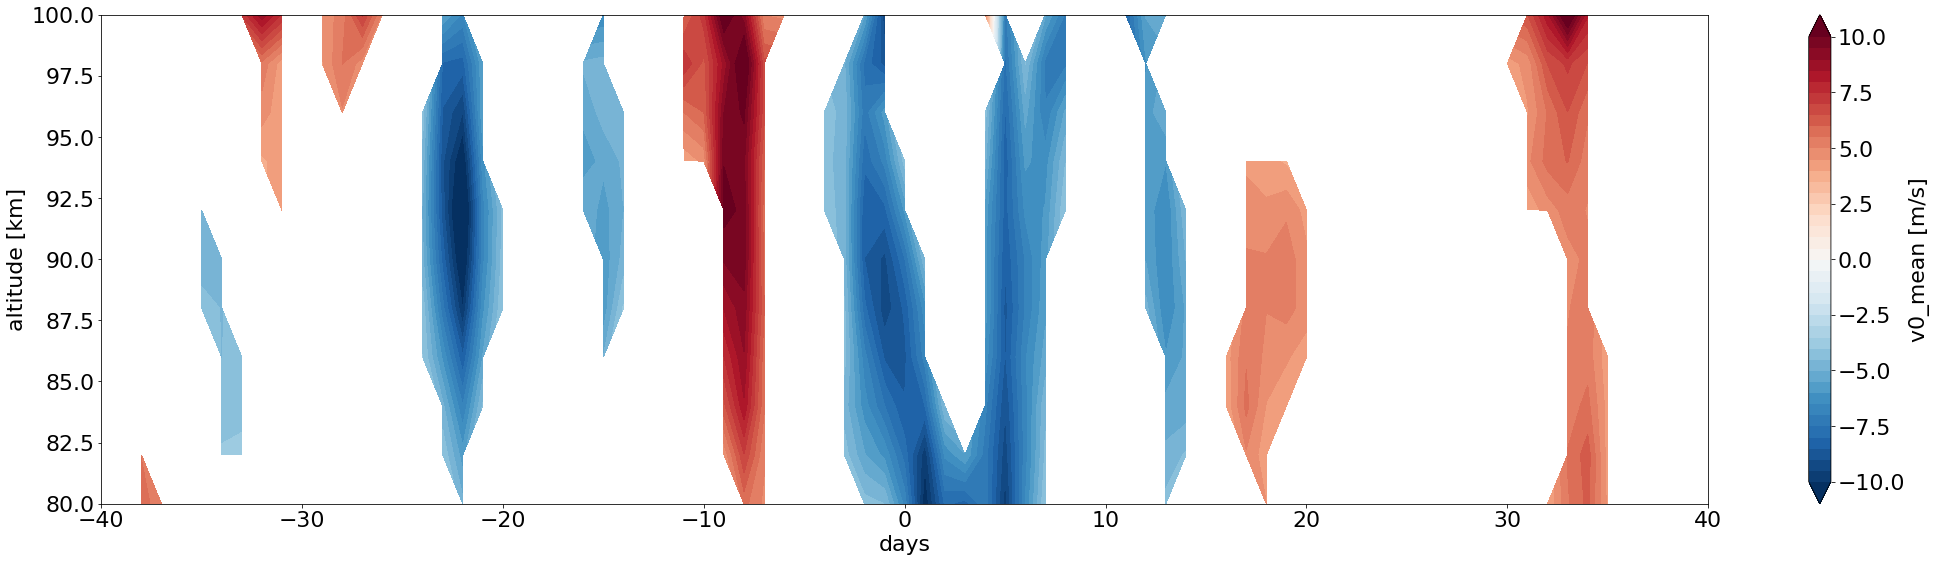

In [7]:
# plotting_routine(sea_v_anomalie,'v0')
stat_signific(station, sea_v_anomalie, v_anomalie, "v0")

## Wave estimates

In [8]:
ds_waves = read_group("waves", station)
gw = read_var(ds_waves, "GW")
pw = read_var(ds_waves, "PW")

gw_anomalie = anomalie("dayofyear", gw)

pw_anomalie = anomalie("dayofyear", pw)

sea_gw = sea(40, station, gw)
# sea_gw.name = 'sea_gw'
sea_gw_anomalie = sea(40, station, gw_anomalie)
sea_gw_anomalie["name"] = "sea_gw_anomalie"

sea_pw = sea(40, station, pw)
# sea_pw.name = 'sea_pw'
sea_pw_anomalie = sea(40, station, pw_anomalie)
sea_pw_anomalie["name"] = "sea_pw_anomalie"

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Gravity waves

#### Gravity wave activity

##### Climatology

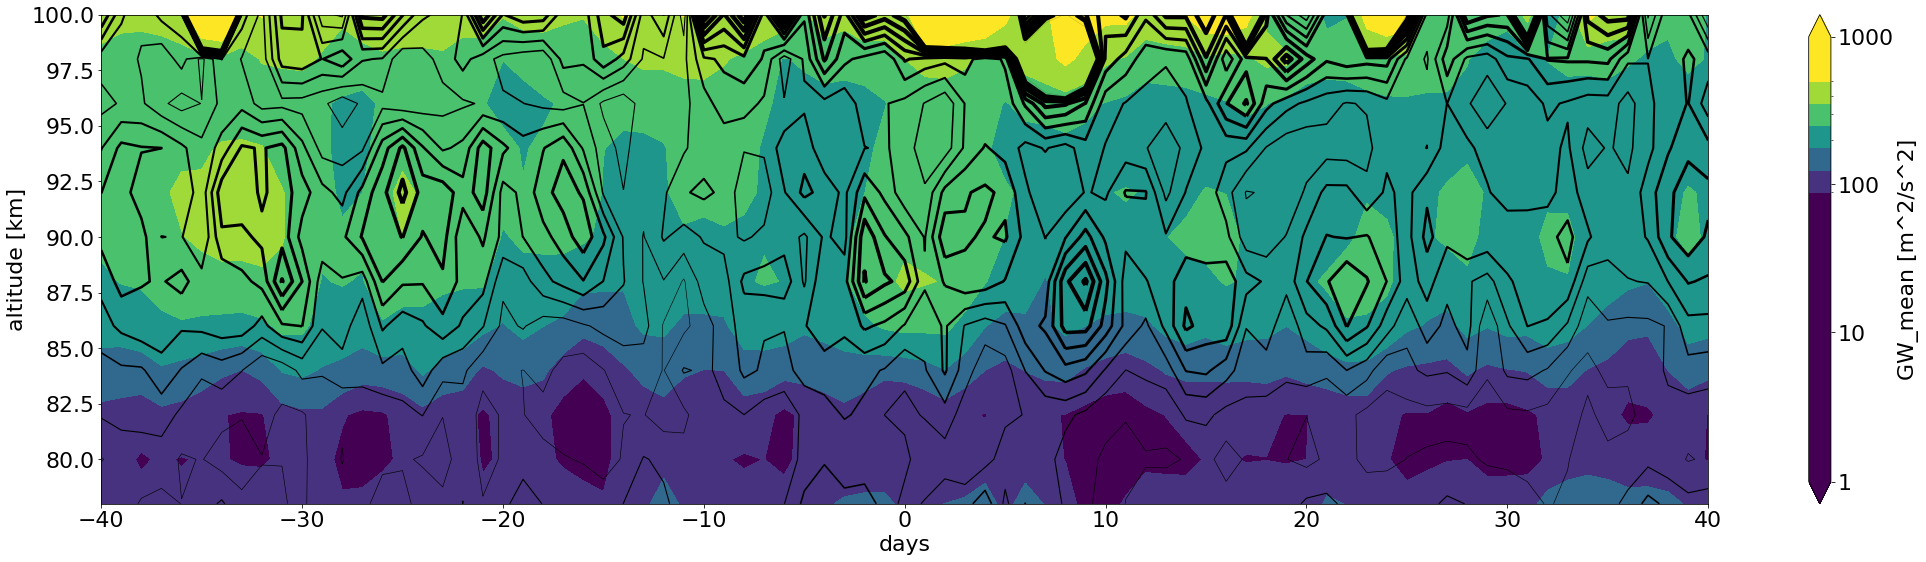

In [9]:
plotting_routine(sea_gw, "GW", True)

##### Anomalies

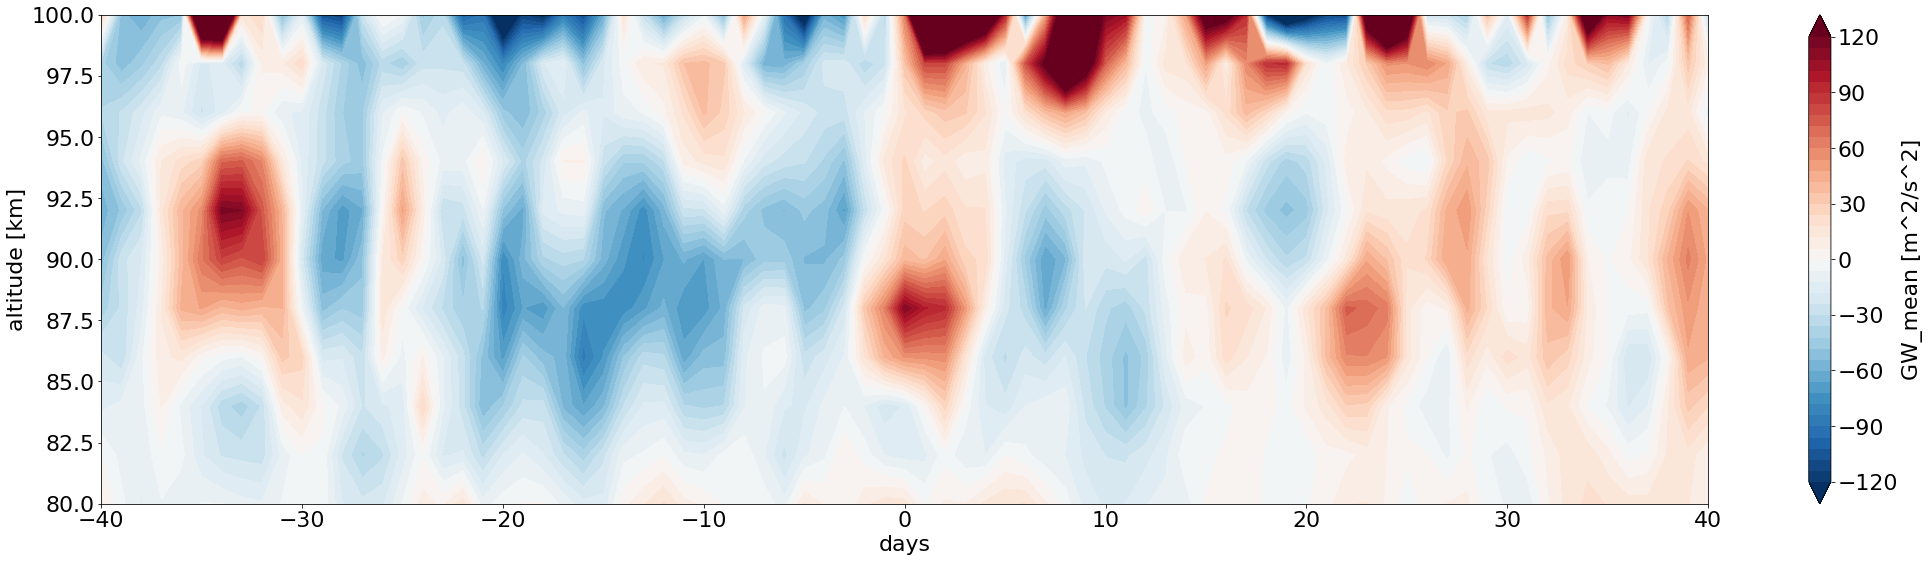

In [10]:
# plotting_routine(sea_gw_anomalie,'GW')
stat_signific(station, sea_gw_anomalie, gw_anomalie, "GW")

#### Gravity wave drag

In [11]:
directory = glob.glob(f"{root_path}GWD*_{station}.nc")[0]

ds = xr.open_dataset(directory)

gwd = ds["GWD"]

gwd_anomalie = anomalie("dayofyear", gwd)

sea_gwd = sea(40, station, gwd)
# sea_gwd.name = 'sea_gwd'
sea_gwd_anomalie = sea(40, station, gwd_anomalie)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


##### Climatology

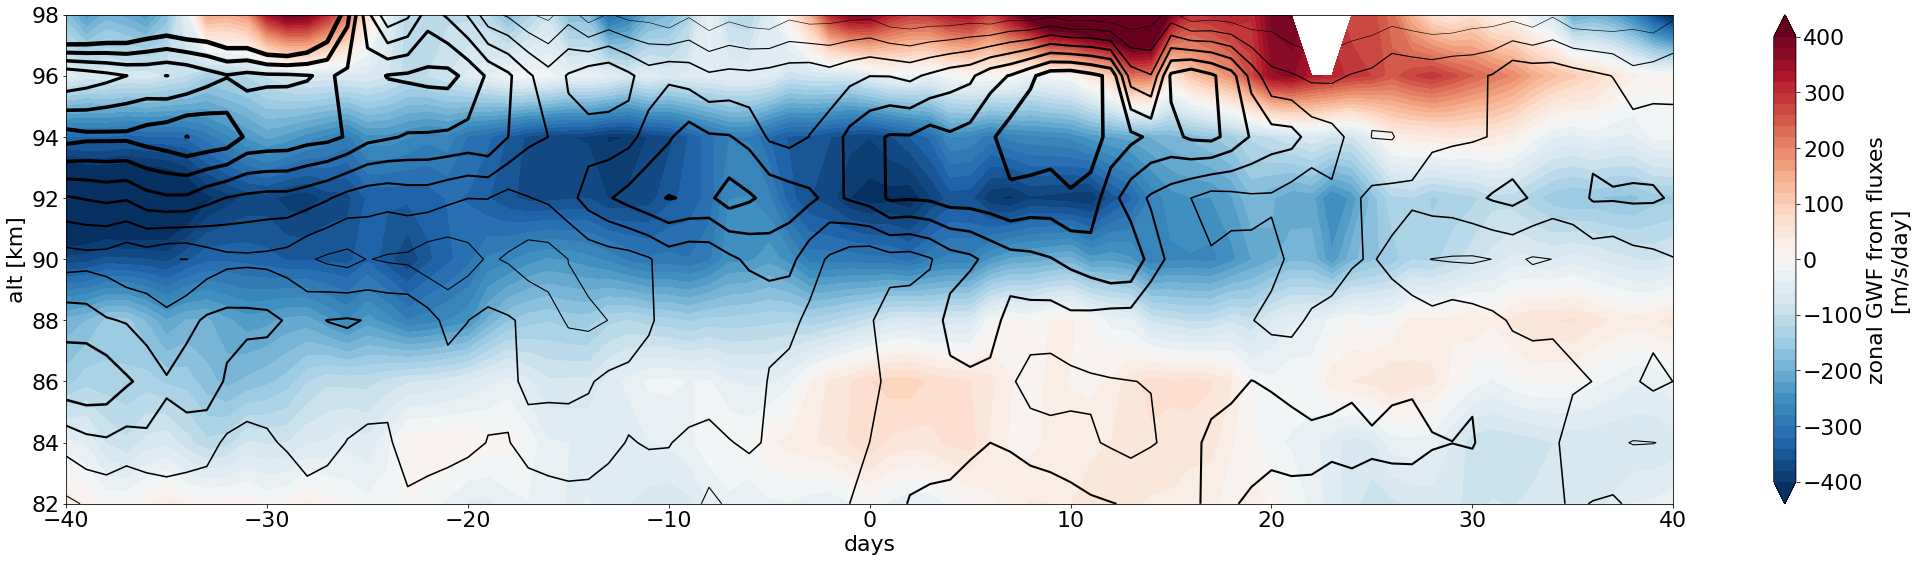

In [12]:
plotting_routine(sea_gwd, "GWD")

##### Anomalies

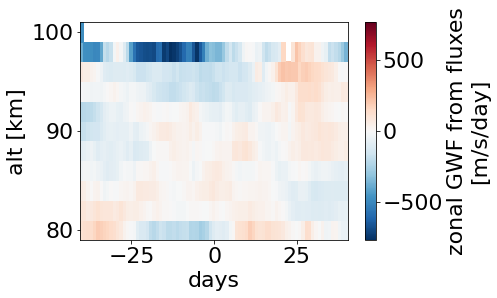

In [13]:
sea_gwd_anomalie.sel(alt=slice(80, 100))["GWD_mean"].dropna("days", how="all").plot(
    x="days"
)

In [14]:
gwd_anomalie

<xarray.DataArray 'GWD' (time: 143928, alt: 26)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * alt        (alt) int64 70 72 74 76 78 80 82 ... 108 110 112 114 116 118 120
    month      (time) int64 8 8 8 8 8 8 8 8 8 8 ... 12 12 12 12 12 12 12 12 12
  * time       (time) datetime64[ns] 2004-08-01 ... 2020-12-31T23:00:00
    dayofyear  (time) int64 214 214 214 214 214 214 ... 366 366 366 366 366 366
Attributes:
    units:      m/s/day
    long_name:  zonal GWF from fluxes

In [19]:
from resampling import _resample_iterations_idx

In [89]:
rnd_arr = _resample_iterations_idx(
    u_anomalie, 10000, "time", replace=True, chunk=False, dim_max=7
)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


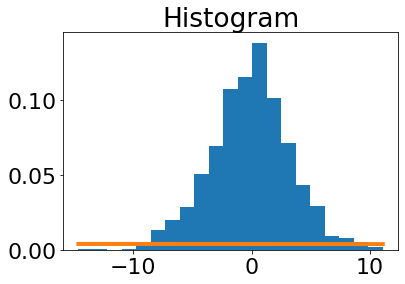

In [91]:
bins = rnd_arr.sel(alt=90).plot.hist(density=True, bins=21)
x = bins[1]
plt.plot(x, kde(x), lw=4)

In [96]:
gwd_anomalie.sel(alt=90).dropna("time")

<xarray.DataArray 'GWD' (time: 141351)>
array([ 112.40663859,  117.38937383,  118.0472012 , ..., -657.68522347,
       -663.94046979, -666.08866837])
Coordinates:
    alt        int64 90
    month      (time) int64 8 8 8 8 8 8 8 8 8 8 ... 10 10 10 10 10 10 10 10 10
  * time       (time) datetime64[ns] 2004-08-01 ... 2020-10-18T20:00:00
    dayofyear  (time) int64 214 214 214 214 214 214 ... 292 292 292 292 292 292
Attributes:
    units:      m/s/day
    long_name:  zonal GWF from fluxes

In [126]:
mask = np.isin(gwd_anomalie.time.dt.month, [12, 1, 2])
mask

array([False, False, False, ...,  True,  True,  True])

(array([4.11376124e-05, 1.39410798e-04, 3.03504162e-04, 2.75164918e-04,
        4.92280095e-04, 6.59573052e-04, 1.10523052e-03, 1.93849571e-03,
        1.96957746e-03, 1.63636280e-03, 1.50152285e-03, 1.79725658e-03,
        1.19801869e-03, 9.04113303e-04, 5.68613220e-04, 3.37328422e-04,
        3.65667666e-04, 2.81107018e-04, 1.57237096e-04, 1.19299076e-04,
        4.98222194e-05]),
 array([-621.54987583, -558.42144523, -495.29301463, -432.16458402,
        -369.03615342, -305.90772282, -242.77929222, -179.65086161,
        -116.52243101,  -53.39400041,    9.7344302 ,   72.8628608 ,
         135.9912914 ,  199.119722  ,  262.24815261,  325.37658321,
         388.50501381,  451.63344441,  514.76187502,  577.89030562,
         641.01873622,  704.14716683]),
 <a list of 21 Patch objects>)

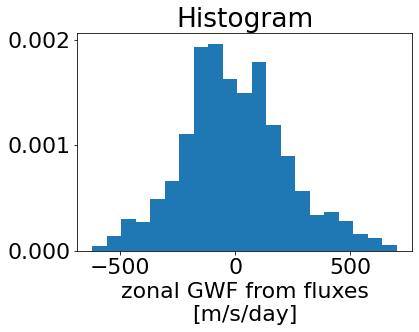

In [139]:
temp = gwd_anomalie.sel(alt=90, time=mask).dropna("time")
temp.plot.hist(density=True, bins=21)

In [140]:
temp.std()

<xarray.DataArray 'GWD' ()>
array(226.26871603)
Coordinates:
    alt      int64 90
Attributes:
    units:      m/s/day
    long_name:  zonal GWF from fluxes

In [143]:
temp.median()

<xarray.DataArray 'GWD' ()>
array(-16.66032727)
Coordinates:
    alt      int64 90
Attributes:
    units:      m/s/day
    long_name:  zonal GWF from fluxes

In [137]:
gwd_anomalie.sel(alt=90, time=mask).dropna("time").min()

<xarray.DataArray 'GWD' ()>
array(-621.54987583)
Coordinates:
    alt      int64 90
Attributes:
    units:      m/s/day
    long_name:  zonal GWF from fluxes

In [129]:
rnd_arr = _resample_iterations_idx(
    gwd_anomalie.sel(alt=90, time=mask).dropna("time"),
    10000,
    "time",
    replace=True,
    chunk=False,
    dim_max=7,
)

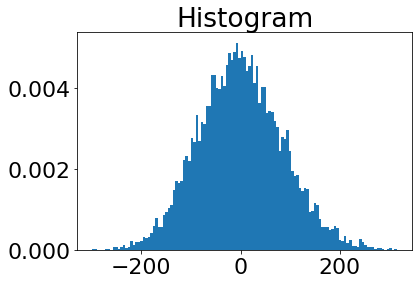

In [130]:
bins = rnd_arr.plot.hist(density=True, bins=121)
x = bins[1]
# plt.plot(x, kde(x), lw = 4)

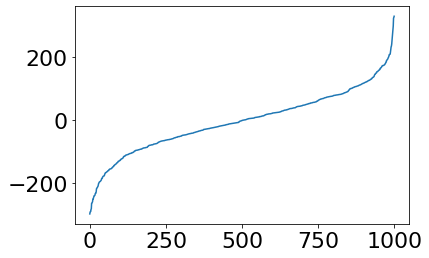

In [108]:
plt.plot(sorted(rnd_arr.values))

In [109]:
sorted(rnd_arr.values)[950]

159.34056796834292

In [68]:
sum(kde(x))

0.03681878805905249

In [119]:
density = bins[0]
widths = bins[1][1:] - bins[1][:-1]
(density * widths).sum()

0.9999999999999999

In [63]:
kde(bins[1])

array([4.60158876e-05, 8.39539678e-05, 1.77245661e-04, 3.17387348e-04,
       6.27326636e-04, 1.12910039e-03, 1.51600026e-03, 1.91703774e-03,
       2.59364554e-03, 3.39852309e-03, 3.87467384e-03, 3.89062727e-03,
       3.72382960e-03, 3.55480080e-03, 3.00138476e-03, 2.30099679e-03,
       1.82564957e-03, 1.36982865e-03, 8.38975235e-04, 3.95073172e-04,
       1.68956118e-04, 6.77557316e-05])

In [49]:
y = rnd_arr.sel(alt=90)
mask = np.isnan(y)
np.count_nonzero(mask)

0

In [52]:
rnd_arr.sel(alt=90).dropna("iteration")

<xarray.DataArray (iteration: 1000)>
array([-3.77157959e+01,  2.93520800e+01, -1.51821136e+02, -3.70703403e+01,
       -9.83205540e+00,  5.72697300e+01, -1.49033552e+02,  4.68576514e+01,
       -8.01606144e+00,  4.71952455e+01, -3.78311338e+01, -1.03581313e+01,
        7.78780905e+01, -3.88187467e+01,  1.18626733e+02, -2.21664879e+01,
        6.50756482e+01,  5.01509457e+01,  1.95985758e+02, -6.66767980e+01,
        2.50835459e+01,  1.29671828e+02, -6.85277481e+01, -2.50005599e+01,
        1.91769195e+01, -1.19299767e+02, -1.31149367e+02, -3.33073892e+01,
       -3.64576928e+01, -1.94433086e+01, -4.79939025e+01, -1.36533786e+02,
        1.53493514e+02,  2.46966417e+01,  6.26461567e+01, -3.15024323e+01,
       -1.71216127e+02, -4.37510544e+00, -7.06674075e+01, -3.05612224e+02,
       -1.76323401e+02, -1.05799045e+02,  1.61429865e+02, -1.01952969e+02,
        1.23965181e+02,  4.19997534e+01, -5.23669609e+01,  4.40450362e+00,
       -1.20618643e+02, -9.07368011e+01,  5.21253149e+01,  2.01738569e+01,
       -1.44100034e+02,  1.39786294e+01,  1.74427485e+00, -4.51973326e+01,
        1.96206422e+02,  4.27260497e+01, -1.27002712e+00,  1.67648225e+02,
       -6.10914796e+01,  6.54617746e+00, -1.18859497e+02, -1.54150559e+02,
        1.40328833e+02, -5.13645571e+01,  4.80098415e+01, -1.35695907e+01,
       -4.70011084e+01, -6.63231295e+01, -1.72982401e+02, -2.12878033e+02,
        1.13447863e+01, -2.05397669e+02, -6.56500729e+01,  6.72478691e+01,
       -4.89531163e+01, -7.12718935e+01, -8.06036798e+01, -1.39105458e+02,
       -9.54756384e+01,  2.27132102e+01,  5.59043978e+01,  1.06900612e+02,
        2.06994366e+01, -1.02632081e+02, -2.78589612e+01, -1.69780167e+01,
        1.89127561e+02,  1.85201507e+02,  1.87790468e+02, -1.73868596e+02,
       -7.68428841e+01, -4.81521954e+01,  9.34312542e+00,  7.92205764e+01,
        1.33203776e+01,  7.56670272e+00, -2.35497678e+01,  6.10499579e+01,
        1.99716299e+01,  2.46663091e+02,  7.09807285e+00,  5.58204222e+01,
       -1.39344692e+02,  2.54856634e+01, -7.81228823e+01,  5.53387378e+01,
       -1.78919468e+02,  1.65135697e+02, -1.61834514e+00,  2.35180981e+02,
        1.04539183e+02,  3.98127593e+00,  1.03299026e+02, -1.73498539e+01,
        1.47939161e+02,  4.17781278e+01, -1.61297816e+01, -1.43161942e+01,
       -1.99842564e+02, -5.35210407e+01, -1.67553042e+02, -4.89073200e+01,
       -6.69276671e+01,  1.41549365e+02, -7.63807608e+01,  1.31495438e+02,
       -1.86258099e+02, -2.27948748e+00,  9.49742567e+01, -2.88412069e+01,
       -3.29873769e+01, -5.35247662e+01, -7.97614340e+01,  2.97216132e+01,
        2.48978095e+01, -9.46683757e+01,  6.02615884e+01,  1.92747498e+01,
       -3.59043462e+01, -1.67056174e+02,  1.27243075e+02, -1.89113287e+02,
        1.91896007e+01, -8.11622845e+01, -9.48382194e+00,  2.01130913e+01,
       -2.50635696e+01,  3.29228361e+00, -7.81579169e+01, -1.90580286e+01,
        1.46475540e+02, -1.78189580e+01,  4.68922769e+01,  8.07519554e+01,
        1.24397410e+02,  5.22693426e+01,  6.93435894e+01, -1.26321170e+01,
        1.72338450e+02, -4.52453297e+00,  2.38933864e+02,  1.90495229e+02,
       -1.09068596e+01, -5.19044792e+01, -3.05864696e+01, -1.14987276e+02,
       -5.32251008e+01,  7.96205355e+01,  1.29062460e+02, -1.19297084e+01,
       -1.08003327e+02, -1.40581968e+01,  4.53003077e+01, -1.84903392e+01,
       -1.14254056e+02, -5.72805778e+00,  1.02047922e+02,  1.76161673e+02,
        7.13269731e+01, -8.89701232e+01,  1.19142153e+02, -1.07473012e+01,
       -4.61078183e+01,  2.18638293e+01, -5.30480905e+01, -4.05545320e+00,
        3.44943747e+01, -1.05466644e+01, -5.17940327e+01,  1.73091929e+01,
       -1.14797373e+02,  4.60024303e+01,  2.52223500e+01,  1.50856957e+01,
       -3.98701428e+01,  1.93189559e+01, -8.96845444e+01,  1.26005687e+01,
        8.76302611e+01, -1.43361640e+02,  1.35912416e+01, -1.47598864e+02,
       -2.40013592e+01, -1.23096236e+02, -9.06933507e+01, -9.65461639e+00,
        9.71474275e-01,  8.88055758e+01, -1.37449766e+02,  7.61

In [50]:
mask

<xarray.DataArray (iteration: 1000)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, F

In [32]:
rnd_arr.sel(alt=90).quantile(0.95)

<xarray.DataArray ()>
array(157.72614045)
Coordinates:
    quantile  float64 0.95

In [46]:
rnd_arr.sel(alt=90).quantile(0.05)

<xarray.DataArray ()>
array(-167.08101786)
Coordinates:
    quantile  float64 0.05

In [45]:
sea_gwd_anomalie.sel(alt=90, days=0)["GWD_mean"]

<xarray.DataArray 'GWD_mean' ()>
array(-11.58637319)
Coordinates:
    alt      int64 90
    days     int64 0
Attributes:
    units:      m/s/day
    long_name:  zonal GWF from fluxes

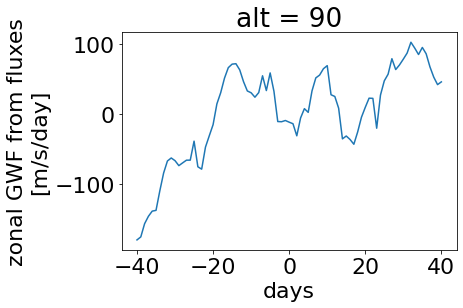

In [30]:
sea_gwd_anomalie.sel(alt=90)["GWD_mean"].plot()

In [34]:
rnd_arr

<xarray.DataArray (alt: 26, iteration: 1000)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * alt        (alt) int64 70 72 74 76 78 80 82 ... 108 110 112 114 116 118 120
  * iteration  (iteration) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

In [37]:
sea_gwd_anomalie.sel(days=0, alt=slice(80, 100))["GWD_mean"]

<xarray.DataArray 'GWD_mean' (alt: 11)>
array([-101.71251428,   33.29621084,   85.89718485,   67.76356449,
         11.70194394,  -11.58637319,  -67.30789868, -199.12337665,
       -174.34816066, -326.70354413,           nan])
Coordinates:
  * alt      (alt) int64 80 82 84 86 88 90 92 94 96 98 100
    days     int64 0
Attributes:
    units:      m/s/day
    long_name:  zonal GWF from fluxes

In [38]:
da_kde = xr.apply_ufunc(
    g_kde,
    rnd_arr.sel(alt=slice(80, 100)),
    sea_gwd_anomalie.sel(days=0, alt=slice(80, 100))["GWD_mean"],
    input_core_dims=[["iteration"], []],
    vectorize=True,
    dask="parallelized",
    exclude_dims=set(("iteration",)),
    output_core_dims=[[]],
    output_dtypes=[rnd_arr.dtype],
)

In [42]:
rnd_arr.sel(alt=90)

<xarray.DataArray (iteration: 1000)>
array([-3.77157959e+01,  2.93520800e+01, -1.51821136e+02, -3.70703403e+01,
       -9.83205540e+00,  5.72697300e+01, -1.49033552e+02,  4.68576514e+01,
       -8.01606144e+00,  4.71952455e+01, -3.78311338e+01, -1.03581313e+01,
        7.78780905e+01, -3.88187467e+01,  1.18626733e+02, -2.21664879e+01,
        6.50756482e+01,  5.01509457e+01,  1.95985758e+02, -6.66767980e+01,
        2.50835459e+01,  1.29671828e+02, -6.85277481e+01, -2.50005599e+01,
        1.91769195e+01, -1.19299767e+02, -1.31149367e+02, -3.33073892e+01,
       -3.64576928e+01, -1.94433086e+01, -4.79939025e+01, -1.36533786e+02,
        1.53493514e+02,  2.46966417e+01,  6.26461567e+01, -3.15024323e+01,
       -1.71216127e+02, -4.37510544e+00, -7.06674075e+01, -3.05612224e+02,
       -1.76323401e+02, -1.05799045e+02,  1.61429865e+02, -1.01952969e+02,
        1.23965181e+02,  4.19997534e+01, -5.23669609e+01,  4.40450362e+00,
       -1.20618643e+02, -9.07368011e+01,  5.21253149e+01,  2.01738569e+01,
       -1.44100034e+02,  1.39786294e+01,  1.74427485e+00, -4.51973326e+01,
        1.96206422e+02,  4.27260497e+01, -1.27002712e+00,  1.67648225e+02,
       -6.10914796e+01,  6.54617746e+00, -1.18859497e+02, -1.54150559e+02,
        1.40328833e+02, -5.13645571e+01,  4.80098415e+01, -1.35695907e+01,
       -4.70011084e+01, -6.63231295e+01, -1.72982401e+02, -2.12878033e+02,
        1.13447863e+01, -2.05397669e+02, -6.56500729e+01,  6.72478691e+01,
       -4.89531163e+01, -7.12718935e+01, -8.06036798e+01, -1.39105458e+02,
       -9.54756384e+01,  2.27132102e+01,  5.59043978e+01,  1.06900612e+02,
        2.06994366e+01, -1.02632081e+02, -2.78589612e+01, -1.69780167e+01,
        1.89127561e+02,  1.85201507e+02,  1.87790468e+02, -1.73868596e+02,
       -7.68428841e+01, -4.81521954e+01,  9.34312542e+00,  7.92205764e+01,
        1.33203776e+01,  7.56670272e+00, -2.35497678e+01,  6.10499579e+01,
        1.99716299e+01,  2.46663091e+02,  7.09807285e+00,  5.58204222e+01,
       -1.39344692e+02,  2.54856634e+01, -7.81228823e+01,  5.53387378e+01,
       -1.78919468e+02,  1.65135697e+02, -1.61834514e+00,  2.35180981e+02,
        1.04539183e+02,  3.98127593e+00,  1.03299026e+02, -1.73498539e+01,
        1.47939161e+02,  4.17781278e+01, -1.61297816e+01, -1.43161942e+01,
       -1.99842564e+02, -5.35210407e+01, -1.67553042e+02, -4.89073200e+01,
       -6.69276671e+01,  1.41549365e+02, -7.63807608e+01,  1.31495438e+02,
       -1.86258099e+02, -2.27948748e+00,  9.49742567e+01, -2.88412069e+01,
       -3.29873769e+01, -5.35247662e+01, -7.97614340e+01,  2.97216132e+01,
        2.48978095e+01, -9.46683757e+01,  6.02615884e+01,  1.92747498e+01,
       -3.59043462e+01, -1.67056174e+02,  1.27243075e+02, -1.89113287e+02,
        1.91896007e+01, -8.11622845e+01, -9.48382194e+00,  2.01130913e+01,
       -2.50635696e+01,  3.29228361e+00, -7.81579169e+01, -1.90580286e+01,
        1.46475540e+02, -1.78189580e+01,  4.68922769e+01,  8.07519554e+01,
        1.24397410e+02,  5.22693426e+01,  6.93435894e+01, -1.26321170e+01,
        1.72338450e+02, -4.52453297e+00,  2.38933864e+02,  1.90495229e+02,
       -1.09068596e+01, -5.19044792e+01, -3.05864696e+01, -1.14987276e+02,
       -5.32251008e+01,  7.96205355e+01,  1.29062460e+02, -1.19297084e+01,
       -1.08003327e+02, -1.40581968e+01,  4.53003077e+01, -1.84903392e+01,
       -1.14254056e+02, -5.72805778e+00,  1.02047922e+02,  1.76161673e+02,
        7.13269731e+01, -8.89701232e+01,  1.19142153e+02, -1.07473012e+01,
       -4.61078183e+01,  2.18638293e+01, -5.30480905e+01, -4.05545320e+00,
        3.44943747e+01, -1.05466644e+01, -5.17940327e+01,  1.73091929e+01,
       -1.14797373e+02,  4.60024303e+01,  2.52223500e+01,  1.50856957e+01,
       -3.98701428e+01,  1.93189559e+01, -8.96845444e+01,  1.26005687e+01,
        8.76302611e+01, -1.43361640e+02,  1.35912416e+01, -1.47598864e+02,
       -2.40013592e+01, -1.23096236e+02, -9.06933507e+01, -9.65461639e+00,
        9.71474275e-01,  8.88055758e+01, -1.37449766e+02,  7.61

In [47]:
da_kde.sel(alt=90)

<xarray.DataArray ()>
array(0.00391162)
Coordinates:
    alt      int64 90
    days     int64 0

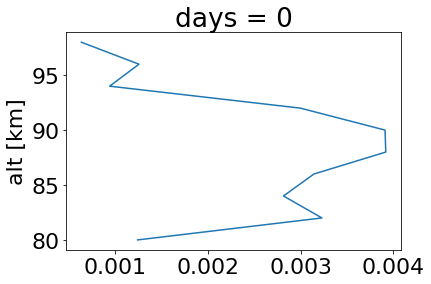

In [41]:
da_kde.plot(y="alt")

In [74]:
rnd_arr.sel(alt=90).dropna("iteration")

<xarray.DataArray (iteration: 1000)>
array([-3.77157959e+01,  2.93520800e+01, -1.51821136e+02, -3.70703403e+01,
       -9.83205540e+00,  5.72697300e+01, -1.49033552e+02,  4.68576514e+01,
       -8.01606144e+00,  4.71952455e+01, -3.78311338e+01, -1.03581313e+01,
        7.78780905e+01, -3.88187467e+01,  1.18626733e+02, -2.21664879e+01,
        6.50756482e+01,  5.01509457e+01,  1.95985758e+02, -6.66767980e+01,
        2.50835459e+01,  1.29671828e+02, -6.85277481e+01, -2.50005599e+01,
        1.91769195e+01, -1.19299767e+02, -1.31149367e+02, -3.33073892e+01,
       -3.64576928e+01, -1.94433086e+01, -4.79939025e+01, -1.36533786e+02,
        1.53493514e+02,  2.46966417e+01,  6.26461567e+01, -3.15024323e+01,
       -1.71216127e+02, -4.37510544e+00, -7.06674075e+01, -3.05612224e+02,
       -1.76323401e+02, -1.05799045e+02,  1.61429865e+02, -1.01952969e+02,
        1.23965181e+02,  4.19997534e+01, -5.23669609e+01,  4.40450362e+00,
       -1.20618643e+02, -9.07368011e+01,  5.21253149e+01,  2.01738569e+01,
       -1.44100034e+02,  1.39786294e+01,  1.74427485e+00, -4.51973326e+01,
        1.96206422e+02,  4.27260497e+01, -1.27002712e+00,  1.67648225e+02,
       -6.10914796e+01,  6.54617746e+00, -1.18859497e+02, -1.54150559e+02,
        1.40328833e+02, -5.13645571e+01,  4.80098415e+01, -1.35695907e+01,
       -4.70011084e+01, -6.63231295e+01, -1.72982401e+02, -2.12878033e+02,
        1.13447863e+01, -2.05397669e+02, -6.56500729e+01,  6.72478691e+01,
       -4.89531163e+01, -7.12718935e+01, -8.06036798e+01, -1.39105458e+02,
       -9.54756384e+01,  2.27132102e+01,  5.59043978e+01,  1.06900612e+02,
        2.06994366e+01, -1.02632081e+02, -2.78589612e+01, -1.69780167e+01,
        1.89127561e+02,  1.85201507e+02,  1.87790468e+02, -1.73868596e+02,
       -7.68428841e+01, -4.81521954e+01,  9.34312542e+00,  7.92205764e+01,
        1.33203776e+01,  7.56670272e+00, -2.35497678e+01,  6.10499579e+01,
        1.99716299e+01,  2.46663091e+02,  7.09807285e+00,  5.58204222e+01,
       -1.39344692e+02,  2.54856634e+01, -7.81228823e+01,  5.53387378e+01,
       -1.78919468e+02,  1.65135697e+02, -1.61834514e+00,  2.35180981e+02,
        1.04539183e+02,  3.98127593e+00,  1.03299026e+02, -1.73498539e+01,
        1.47939161e+02,  4.17781278e+01, -1.61297816e+01, -1.43161942e+01,
       -1.99842564e+02, -5.35210407e+01, -1.67553042e+02, -4.89073200e+01,
       -6.69276671e+01,  1.41549365e+02, -7.63807608e+01,  1.31495438e+02,
       -1.86258099e+02, -2.27948748e+00,  9.49742567e+01, -2.88412069e+01,
       -3.29873769e+01, -5.35247662e+01, -7.97614340e+01,  2.97216132e+01,
        2.48978095e+01, -9.46683757e+01,  6.02615884e+01,  1.92747498e+01,
       -3.59043462e+01, -1.67056174e+02,  1.27243075e+02, -1.89113287e+02,
        1.91896007e+01, -8.11622845e+01, -9.48382194e+00,  2.01130913e+01,
       -2.50635696e+01,  3.29228361e+00, -7.81579169e+01, -1.90580286e+01,
        1.46475540e+02, -1.78189580e+01,  4.68922769e+01,  8.07519554e+01,
        1.24397410e+02,  5.22693426e+01,  6.93435894e+01, -1.26321170e+01,
        1.72338450e+02, -4.52453297e+00,  2.38933864e+02,  1.90495229e+02,
       -1.09068596e+01, -5.19044792e+01, -3.05864696e+01, -1.14987276e+02,
       -5.32251008e+01,  7.96205355e+01,  1.29062460e+02, -1.19297084e+01,
       -1.08003327e+02, -1.40581968e+01,  4.53003077e+01, -1.84903392e+01,
       -1.14254056e+02, -5.72805778e+00,  1.02047922e+02,  1.76161673e+02,
        7.13269731e+01, -8.89701232e+01,  1.19142153e+02, -1.07473012e+01,
       -4.61078183e+01,  2.18638293e+01, -5.30480905e+01, -4.05545320e+00,
        3.44943747e+01, -1.05466644e+01, -5.17940327e+01,  1.73091929e+01,
       -1.14797373e+02,  4.60024303e+01,  2.52223500e+01,  1.50856957e+01,
       -3.98701428e+01,  1.93189559e+01, -8.96845444e+01,  1.26005687e+01,
        8.76302611e+01, -1.43361640e+02,  1.35912416e+01, -1.47598864e+02,
       -2.40013592e+01, -1.23096236e+02, -9.06933507e+01, -9.65461639e+00,
        9.71474275e-01,  8.88055758e+01, -1.37449766e+02,  7.61

In [77]:
import seaborn as sns
from scipy.stats import norm

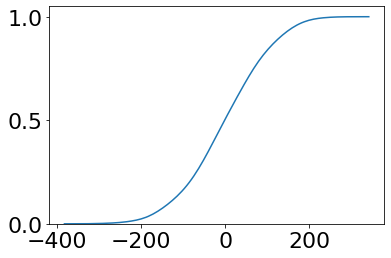

In [79]:
sns.kdeplot(
    data=rnd_arr.sel(alt=90),
    cumulative=True,
)

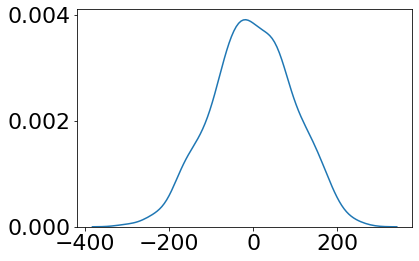

In [85]:
sns.kdeplot(data=rnd_arr.sel(alt=90), cumulative=False)

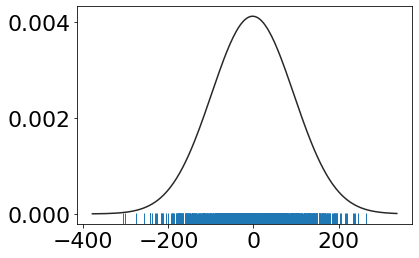

In [78]:
sns.distplot(rnd_arr.sel(alt=90), hist=False, rug=True, kde=False, fit=norm)

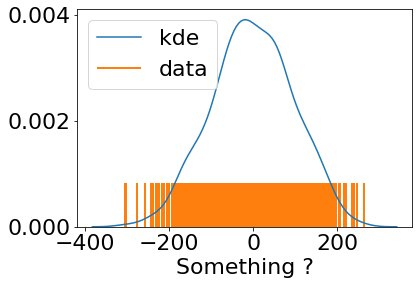

In [76]:
sns.distplot(
    rnd_arr.sel(alt=90),
    hist=False,
    rug=True,
    axlabel="Something ?",
    kde_kws=dict(label="kde"),
    rug_kws=dict(height=0.2, linewidth=2, color="C1", label="data"),
)
plt.legend()

In [70]:
kde = stats.gaussian_kde(rnd_arr.sel(alt=90).values, bw_method="silverman")
out = kde(sea_gwd_anomalie.sel(days=0, alt=90)["GWD_mean"])

In [69]:
kde.pdf(sea_gwd_anomalie.sel(days=0, alt=90)["GWD_mean"])

array([0.00391162])

In [71]:
out

array([0.00389903])

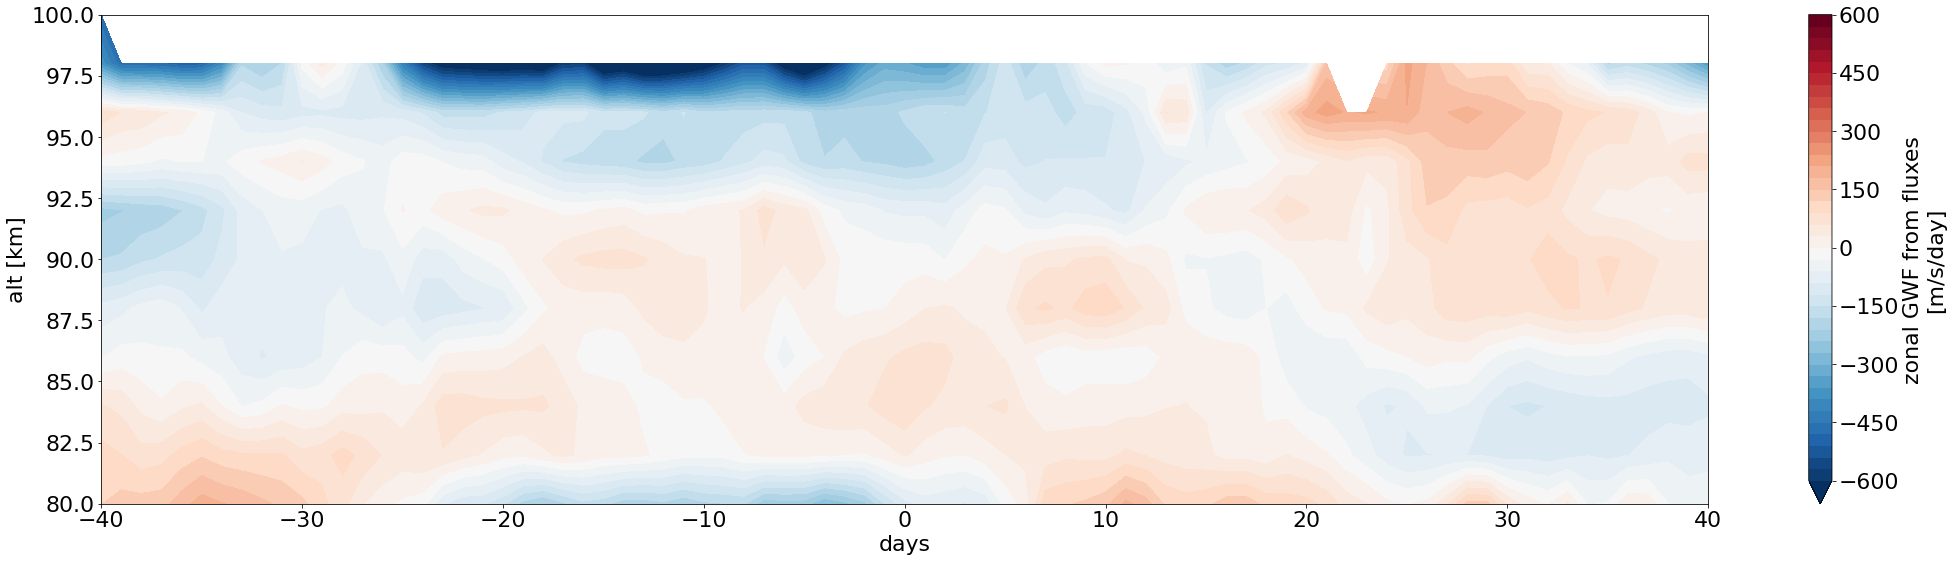

In [15]:
# plotting_routine(sea_gwd_anomalie,'GWD')
stat_signific(station, sea_gwd_anomalie, gwd_anomalie, "GWD")

### Planetary waves

#### Climatology

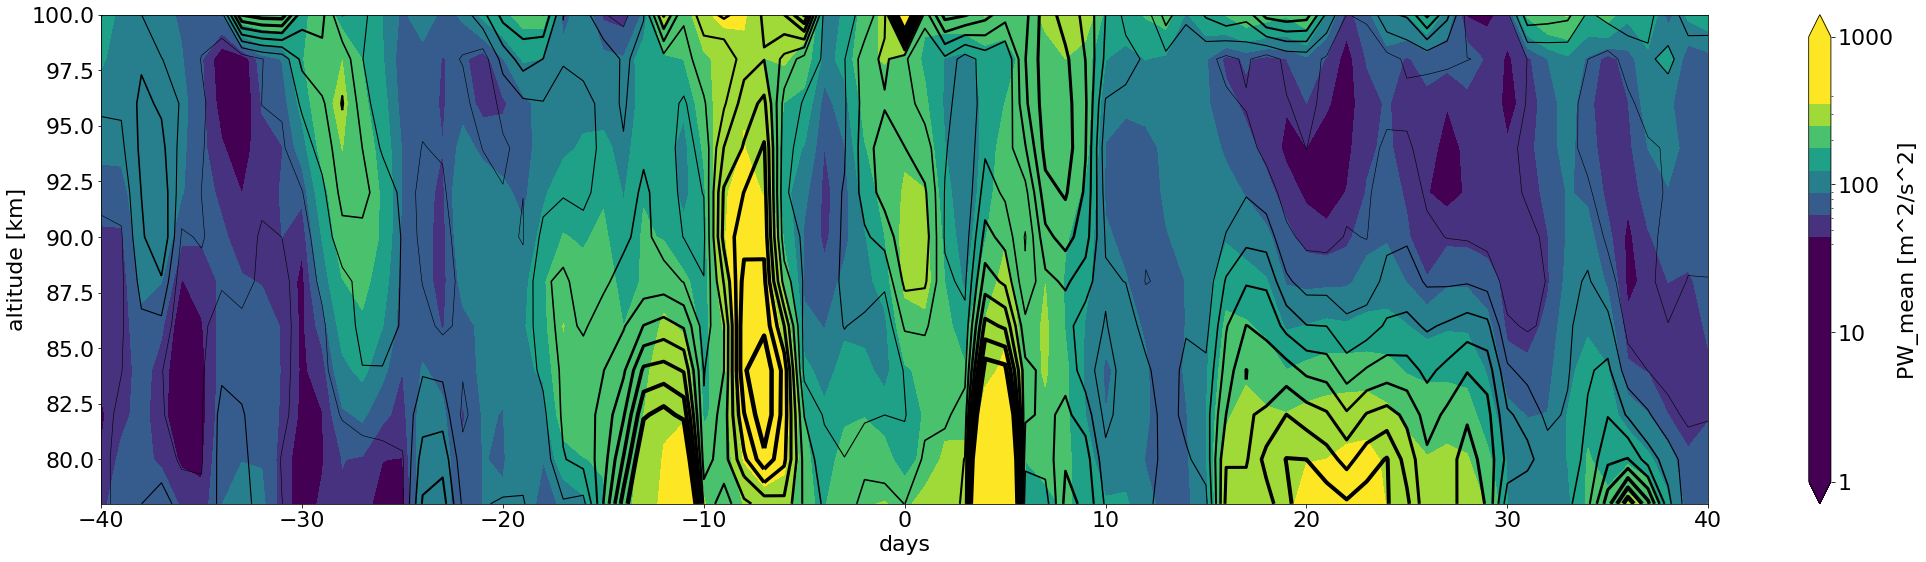

In [16]:
plotting_routine(sea_pw, "PW", True)

#### Anomalies

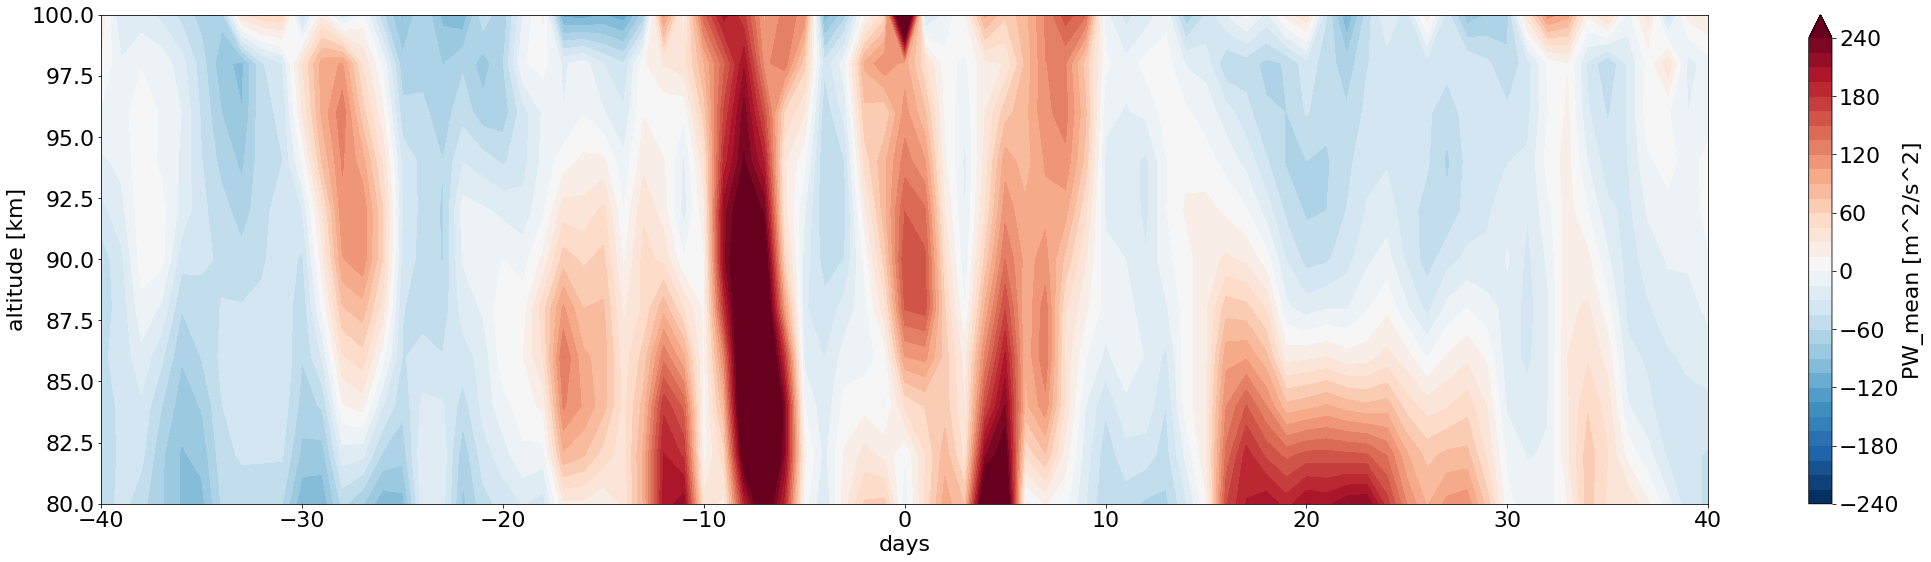

In [17]:
# plotting_routine(sea_pw_anomalie,'PW')
stat_signific(station, sea_pw_anomalie, pw_anomalie, "PW")